## Feature Importance for Decision Trees


#### In decision tree models (like CART, Random Forest), feature importance is calculated based on how much each feature contributes to reducing the impurity (e.g., Gini impurity or entropy) of the splits in the tree. The more a feature is used to split the data, the more important it is considered.

In [1]:
#Model: Random Forest for predicting loan defaults.
#Interpretation: After training the model, you can extract feature importance scores to see which features 
#(e.g., credit score, income, debt-to-income ratio) have the greatest impact on the predictions.
#If the credit score has a high importance score, it indicates that it significantly influences whether a loan will default.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
print(feature_importance.sort_values(by='Importance', ascending=False))


             Feature  Importance
2  petal length (cm)    0.466745
3   petal width (cm)    0.435894
0  sepal length (cm)    0.075891
1   sepal width (cm)    0.021471


### _______________________________________________________________________________________________________________________________

# Activation Maps for Neural Networks

##### In convolutional neural networks (CNNs), activation maps can help visualize the areas of the input image that contribute most to the model's predictions. Techniques like Grad-CAM (Gradient-weighted Class Activation Mapping) can highlight regions in an image that were influential in the final prediction.

# SHAP Values for Tree-Based Models
Description: SHAP (SHapley Additive exPlanations) values can be used for decision trees and ensemble models like Gradient Boosting. SHAP values provide a unified measure of feature importance, reflecting the contribution of each feature to the prediction.

Example:

Model: Gradient Boosting for predicting customer churn.
Interpretation: By calculating SHAP values, you can visualize how each feature (e.g., customer age, subscription length) increases or decreases the predicted likelihood of churn, helping to identify the key drivers behind customer behavior

# Partial Dependence Plots (PDP)
Description: PDPs illustrate the relationship between a feature (or features) and the predicted outcome, showing how the predicted response changes when varying the values of the selected feature(s).

Example:

Model: Linear regression for house price prediction.
Interpretation: A PDP can show how changing the square footage of a house affects its predicted price, helping to understand the relationship between house size and market value.

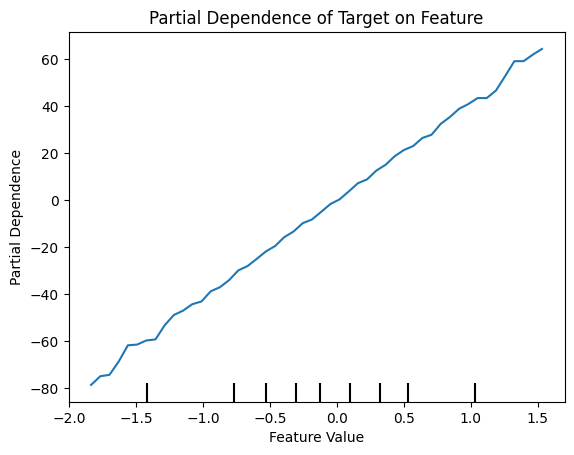

In [14]:
import numpy as np
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
from sklearn.ensemble import RandomForestRegressor
+-f*rom sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Create a synthetic regression dataset (for demonstration)
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Create Partial Dependence Plots using PartialDependenceDisplay
features = [0]  # Specify the index of the feature you want to plot (e.g., square footage)
display = PartialDependenceDisplay.from_estimator(model, X_train, features=features, grid_resolution=50)

# Optional: Set titles and labels if needed
display.axes_[0, 0].set_title("Partial Dependence of Target on Feature")
display.axes_[0, 0].set_ylabel("Partial Dependence")
display.axes_[0, 0].set_xlabel("Feature Value")

# Show the plot
plt.show()
